In [100]:
import pandas as pd
import numpy as np
import scipy 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from random import choices,sample

import os
import gc
import pickle

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

os.chdir("../../")
root_path = os.getcwd()

raw_file_path = os.path.join(root_path, "Bigcon2020_raw_file")
csv_file_path = os.path.join(root_path, "BigCon_2020/csv_files")
pickle_file_path = os.path.join(root_path, "BigCon_2020/pickle_files")

raw_file_folders = os.listdir(raw_file_path)

folder_path = os.path.join(raw_file_path, raw_file_folders[0])

file_names = [file_name for file_name in os.listdir(folder_path) if file_name.split(sep='.')[-1]=='CSV']

df_list = []

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep='|')
    df_list.append(df)

In [ ]:
list(map(lambda x: x.shape, df_list))

In [27]:
flow_age = pd.concat(df_list[:8]).reset_index(drop=True)
flow_time = pd.concat(df_list[8:]).reset_index(drop=True)

In [28]:
flow_age

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,202005,20200527,2726069000,고산3동,0.00,70.07,519.05,956.45,1205.44,1507.57,...,1201.14,1106.57,1728.34,2209.31,2808.54,2721.54,2070.62,1613.50,1086.34,1143.37
2135,202005,20200528,2726069000,고산3동,0.00,99.04,749.36,1085.68,1639.82,1777.32,...,1377.94,1258.02,1847.61,2677.19,3342.68,3036.71,2389.70,1848.92,1291.19,1515.36
2136,202005,20200529,2726069000,고산3동,0.00,155.70,781.70,1235.94,1706.97,1982.74,...,1583.58,1487.06,2149.30,2916.87,3643.31,3395.24,2800.02,2043.25,1356.15,1455.89
2137,202005,20200530,2726069000,고산3동,0.00,119.89,903.85,1236.60,1722.01,2142.41,...,1644.73,1420.31,1812.27,2640.71,3362.25,2909.34,2353.82,1812.56,1242.56,1372.38


In [37]:
melted_flow_age = flow_age.melt(id_vars=['STD_YM','STD_YMD','HDONG_CD','HDONG_NM'], var_name='age', value_name='flow_counts').\
        sort_values(by=['HDONG_CD','STD_YMD','age']).\
        reset_index(drop=True)

In [34]:
melted_flow_time = flow_time.melt(id_vars=['STD_YM','STD_YMD','HDONG_CD','HDONG_NM'], var_name='time', value_name='flow_counts').\
        sort_values(by=['HDONG_CD','STD_YMD','time']).\
        reset_index(drop=True)

In [44]:
tmp1=melted_flow_age.groupby(['STD_YMD','HDONG_CD'])['flow_counts'].sum().reset_index(name='flow_counts_age')
tmp2=melted_flow_time.groupby(['STD_YMD','HDONG_CD'])['flow_counts'].sum().reset_index(name='flow_counts_time')

In [52]:
pd.merge(tmp1,tmp2).eval('flow_diff = flow_counts_age - flow_counts_time')

,STD_YMD,HDONG_CD,flow_counts_age,flow_counts_time,flow_diff
0,20190201,1114052000,242230.68,242230.67,1.000000e-02
1,20190201,1114054000,313074.91,313074.90,1.000000e-02
2,20190201,1114055000,383161.88,383161.87,1.000000e-02
3,20190201,1114057000,142224.17,142224.16,1.000000e-02
4,20190201,1114058000,85446.94,85446.95,-1.000000e-02
...,...,...,...,...,...
16624,20200531,2726066100,31544.92,31544.93,-1.000000e-02
16625,20200531,2726066200,24181.08,24181.05,3.000000e-02
16626,20200531,2726067000,128303.87,128303.87,1.455192e-11
16627,20200531,2726068000,215000.24,215000.26,-2.000000e-02


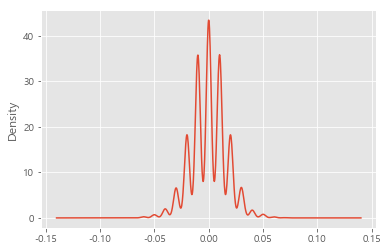

In [51]:
pd.merge(tmp1,tmp2).eval('flow_diff = flow_counts_age - flow_counts_time').flow_diff.plot(kind='kde')

In [54]:
from random import choice

In [57]:
random_dong=choice(melted_flow_time.HDONG_NM)

In [58]:
random_df = melted_flow_time.loc[melted_flow_time.HDONG_NM==random_dong]

In [59]:
random_df

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,time,flow_counts
294984,201902,20190201,2726056000,만촌2동,TMST_00,711.78
294985,201902,20190201,2726056000,만촌2동,TMST_01,487.81
294986,201902,20190201,2726056000,만촌2동,TMST_02,354.89
294987,201902,20190201,2726056000,만촌2동,TMST_03,291.24
294988,201902,20190201,2726056000,만촌2동,TMST_04,301.15
...,...,...,...,...,...,...
300763,202005,20200531,2726056000,만촌2동,TMST_19,3516.92
300764,202005,20200531,2726056000,만촌2동,TMST_20,2980.27
300765,202005,20200531,2726056000,만촌2동,TMST_21,2640.63
300766,202005,20200531,2726056000,만촌2동,TMST_22,2083.49


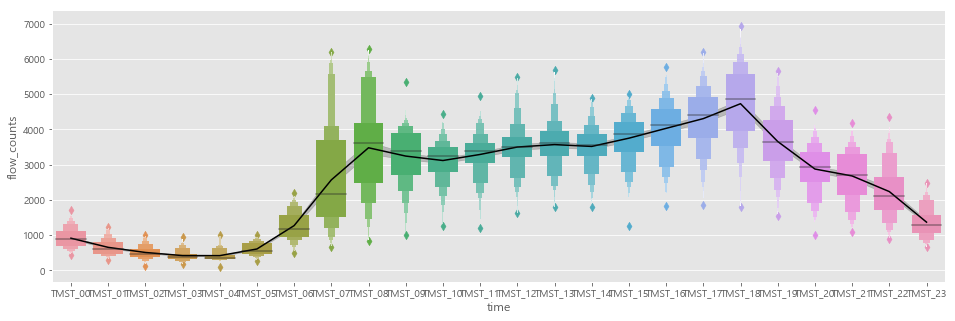

In [69]:
fig, ax = plt.subplots(figsize=(16,5))

sns.lineplot(
    x = random_df.time,
    y = random_df.flow_counts,
    ax = ax,
    linewidth=1.5,
    color='k'
)

sns.boxenplot(
    x = random_df.time,
    y = random_df.flow_counts,
    ax=ax
)

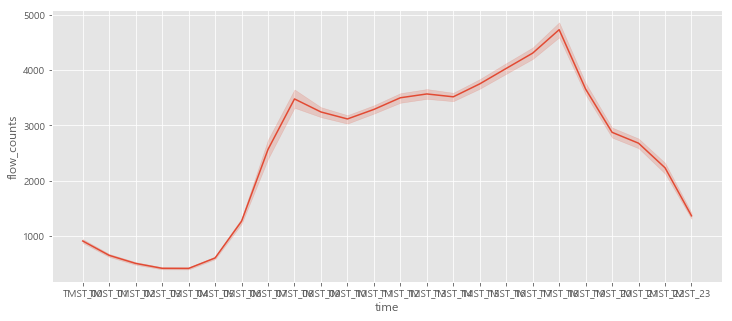

In [61]:
plt.figure(figsize=(12,5))
sns.lineplot(
    x = random_df.time,
    y = random_df.flow_counts
)

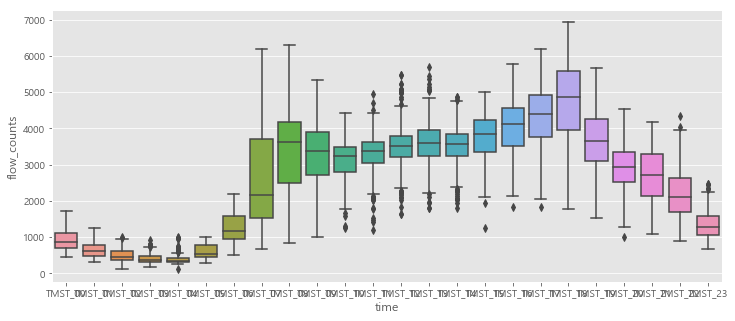

In [62]:
plt.figure(figsize=(12,5))
sns.boxplot(
    x = random_df.time,
    y = random_df.flow_counts
)

In [73]:
melted_flow_age['STD_YMD'] = pd.to_datetime(melted_flow_age.STD_YMD, format='%Y%m%d')
melted_flow_time['STD_YMD'] = pd.to_datetime(melted_flow_time.STD_YMD, format='%Y%m%d')

In [76]:
melted_flow_age['year'] = melted_flow_age.STD_YMD.dt.year.values
melted_flow_age['month'] = melted_flow_age.STD_YMD.dt.month.values
melted_flow_age['weekofyear'] = melted_flow_age.STD_YMD.dt.weekofyear.values
melted_flow_age['dayofweek'] = melted_flow_age.STD_YMD.dt.dayofweek.values
melted_flow_age['weekday'] = np.where(melted_flow_age.dayofweek<5,"평일",'주말')

In [78]:
melted_flow_time['year'] = melted_flow_time.STD_YMD.dt.year.values
melted_flow_time['month'] = melted_flow_time.STD_YMD.dt.month.values
melted_flow_time['weekofyear'] = melted_flow_time.STD_YMD.dt.weekofyear.values
melted_flow_time['dayofweek'] = melted_flow_time.STD_YMD.dt.dayofweek.values
melted_flow_time['weekday'] = np.where(melted_flow_time.dayofweek<5,"평일",'주말')

In [99]:
random_dong

'만촌2동'

In [104]:
melted_flow_time.loc[melted_flow_time.HDONG_NM==random_dong]

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,time,flow_counts,year,month,weekofyear,dayofweek,weekday
294984,201902,2019-02-01,2726056000,만촌2동,TMST_00,711.78,2019,2,5,4,평일
294985,201902,2019-02-01,2726056000,만촌2동,TMST_01,487.81,2019,2,5,4,평일
294986,201902,2019-02-01,2726056000,만촌2동,TMST_02,354.89,2019,2,5,4,평일
294987,201902,2019-02-01,2726056000,만촌2동,TMST_03,291.24,2019,2,5,4,평일
294988,201902,2019-02-01,2726056000,만촌2동,TMST_04,301.15,2019,2,5,4,평일
...,...,...,...,...,...,...,...,...,...,...,...
300763,202005,2020-05-31,2726056000,만촌2동,TMST_19,3516.92,2020,5,22,6,주말
300764,202005,2020-05-31,2726056000,만촌2동,TMST_20,2980.27,2020,5,22,6,주말
300765,202005,2020-05-31,2726056000,만촌2동,TMST_21,2640.63,2020,5,22,6,주말
300766,202005,2020-05-31,2726056000,만촌2동,TMST_22,2083.49,2020,5,22,6,주말


In [175]:
from datetime import timedelta

In [109]:
tmp_df=melted_flow_time.loc[melted_flow_time.HDONG_NM==random_dong,:]

In [185]:
tmp_df['time_with_month'] = tmp_df.apply(lambda x : str(x['STD_YM'])+'_'+x['time'], axis=1)
tmp_df['time_with_date'] = tmp_df.apply(lambda x: x['STD_YMD'] + timedelta(hours=int(x['time'][-2:])), axis=1)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [186]:
tmp_df

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,time,flow_counts,year,month,weekofyear,dayofweek,weekday,time_with_month,time_with_date
294984,201902,2019-02-01,2726056000,만촌2동,TMST_00,711.78,2019,2,5,4,평일,201902_TMST_00,2019-02-01 00:00:00
294985,201902,2019-02-01,2726056000,만촌2동,TMST_01,487.81,2019,2,5,4,평일,201902_TMST_01,2019-02-01 01:00:00
294986,201902,2019-02-01,2726056000,만촌2동,TMST_02,354.89,2019,2,5,4,평일,201902_TMST_02,2019-02-01 02:00:00
294987,201902,2019-02-01,2726056000,만촌2동,TMST_03,291.24,2019,2,5,4,평일,201902_TMST_03,2019-02-01 03:00:00
294988,201902,2019-02-01,2726056000,만촌2동,TMST_04,301.15,2019,2,5,4,평일,201902_TMST_04,2019-02-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300763,202005,2020-05-31,2726056000,만촌2동,TMST_19,3516.92,2020,5,22,6,주말,202005_TMST_19,2020-05-31 19:00:00
300764,202005,2020-05-31,2726056000,만촌2동,TMST_20,2980.27,2020,5,22,6,주말,202005_TMST_20,2020-05-31 20:00:00
300765,202005,2020-05-31,2726056000,만촌2동,TMST_21,2640.63,2020,5,22,6,주말,202005_TMST_21,2020-05-31 21:00:00
300766,202005,2020-05-31,2726056000,만촌2동,TMST_22,2083.49,2020,5,22,6,주말,202005_TMST_22,2020-05-31 22:00:00


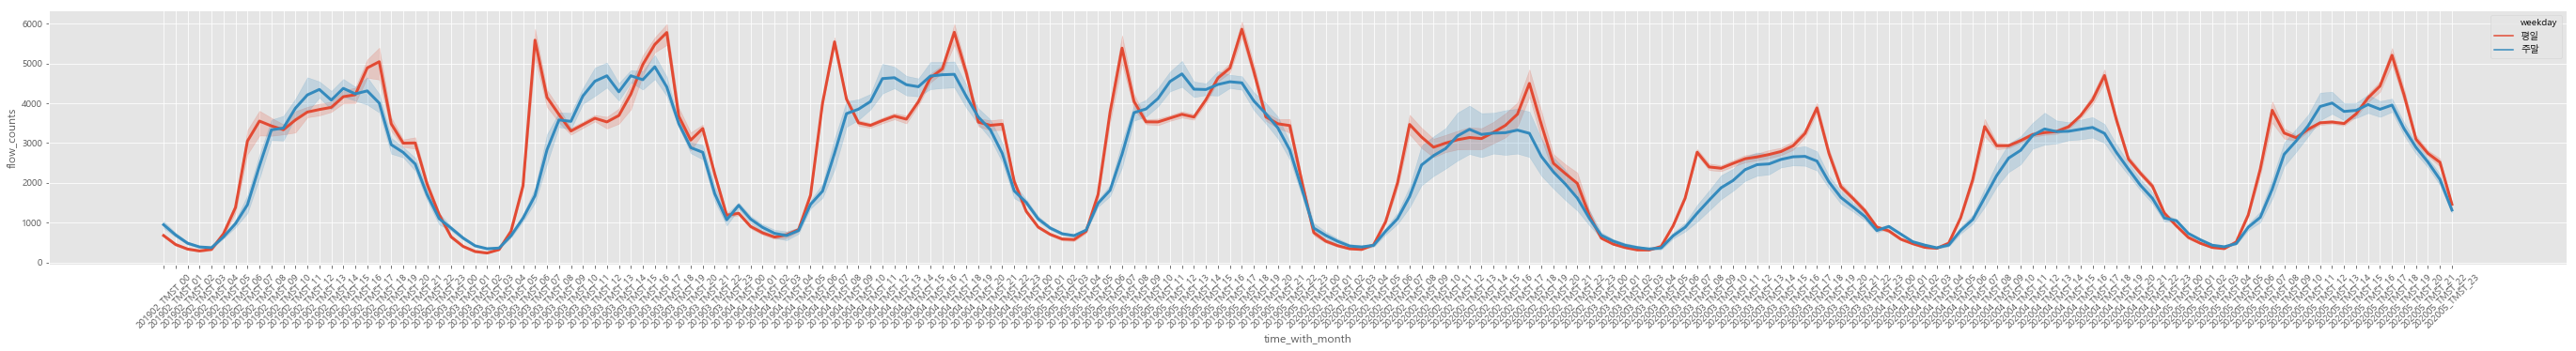

In [172]:
plt.figure(figsize=(48,5))

sns.lineplot(
    x = tmp_df.time_with_month,
    y = tmp_df.flow_counts,
    hue = tmp_df.weekday,
    linewidth = 3
)

return_text = plt.xticks(rotation=45)

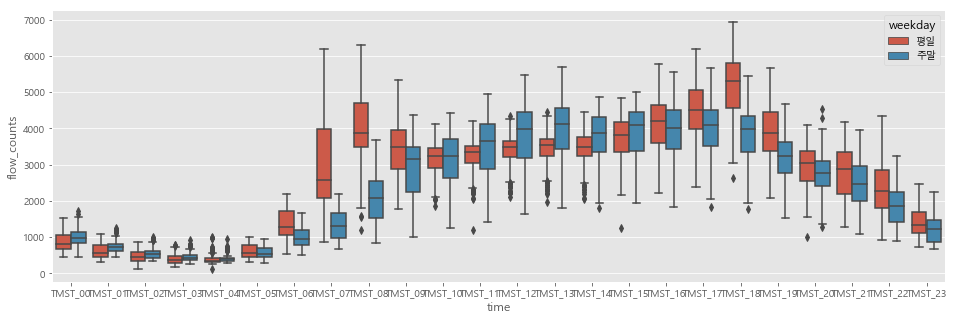

In [118]:
plt.figure(figsize=(16,5))
sns.boxplot(
    x = tmp_df.time,
    y = tmp_df.flow_counts,
    hue = tmp_df.weekday
)

In [434]:
def flow_with_month(flow_df, n_dong=10, sep='time', dongs=[]):
    if len(dongs) >= 1:
        n_dongs = dongs
    else:
        n_dongs = sample(flow_df['HDONG_NM'].unique().tolist(), k=np.min(n_dong, len(dongs)))
    
    for dong in n_dongs:
        print(f'{dong}')
        tmp_df = flow_df.loc[flow_df['HDONG_NM']==dong].reset_index(drop=True)
        tmp_df[f'{sep}_with_month'] = tmp_df.apply(lambda x : str(x['STD_YM'])+'_'+x[sep], axis=1)
        
        plt.figure(figsize=(36,5))

        sns.lineplot(
            x = tmp_df[f'{sep}_with_month'],
            y = tmp_df['flow_counts'],
            hue = tmp_df['weekday'],
            linewidth = 2
        )

        return_text = plt.xticks(rotation=90)
        plt.show()
    gc.collect()

황금1동


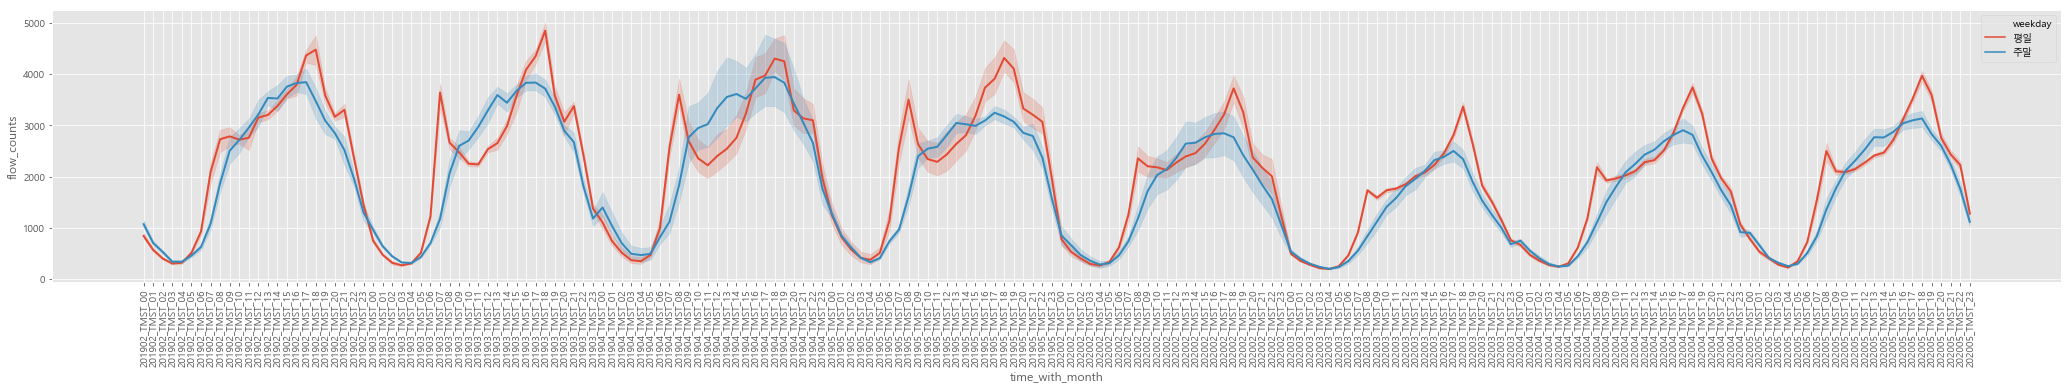

상계5동


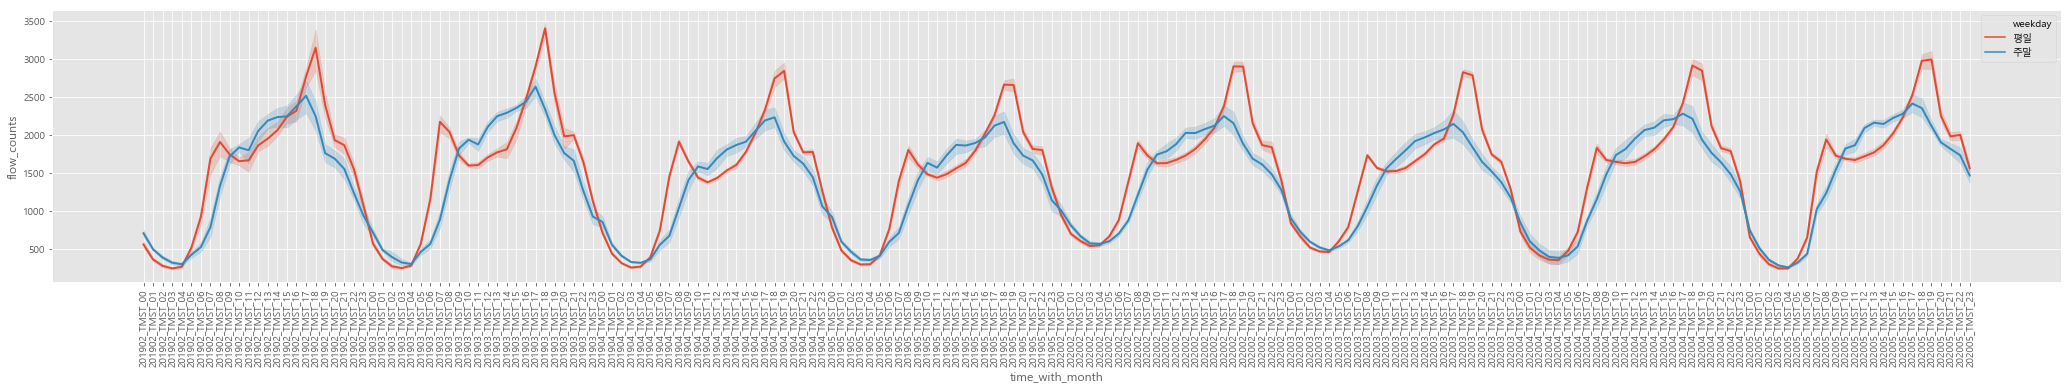

대봉2동


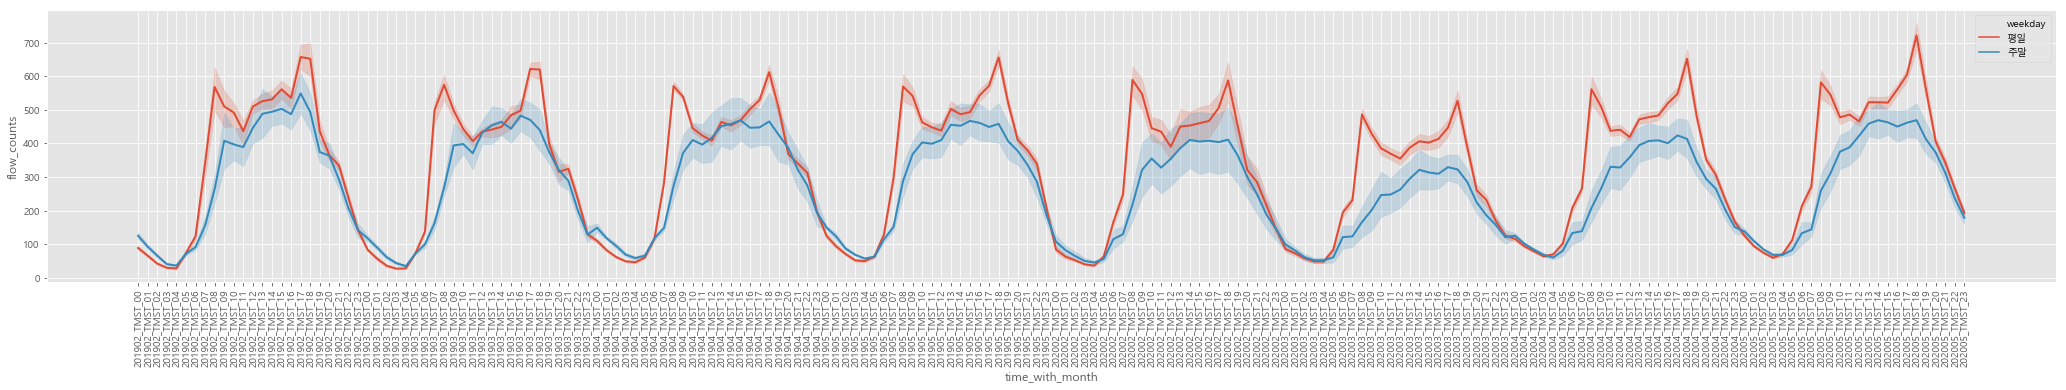

두산동


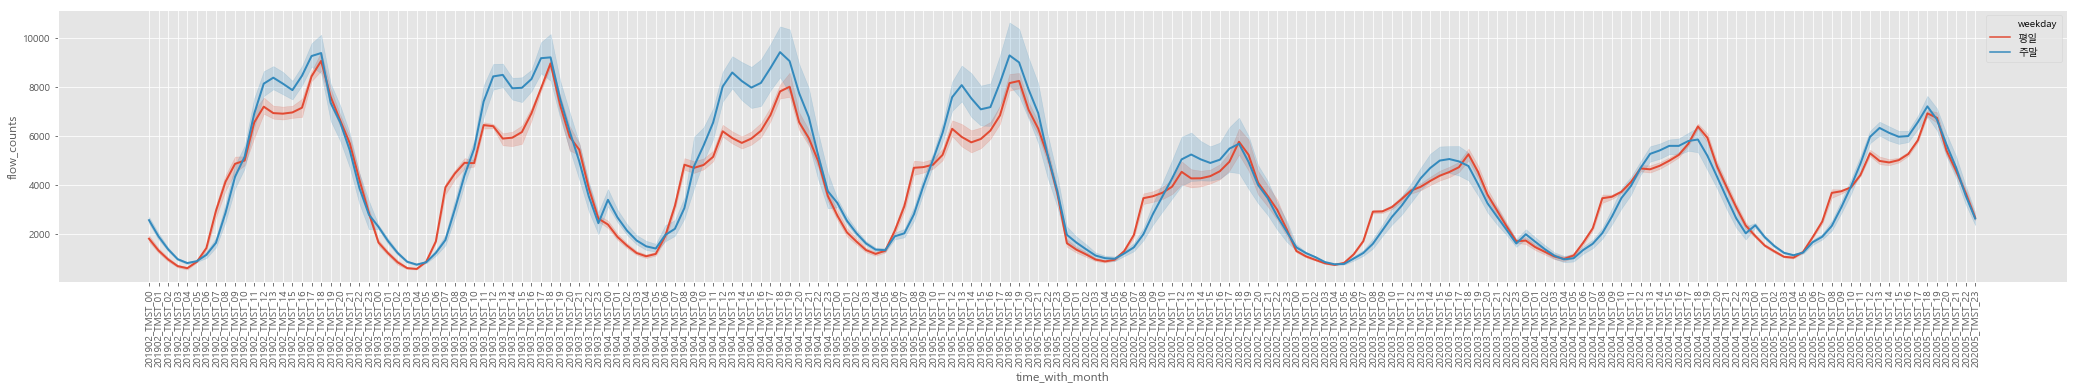

광희동


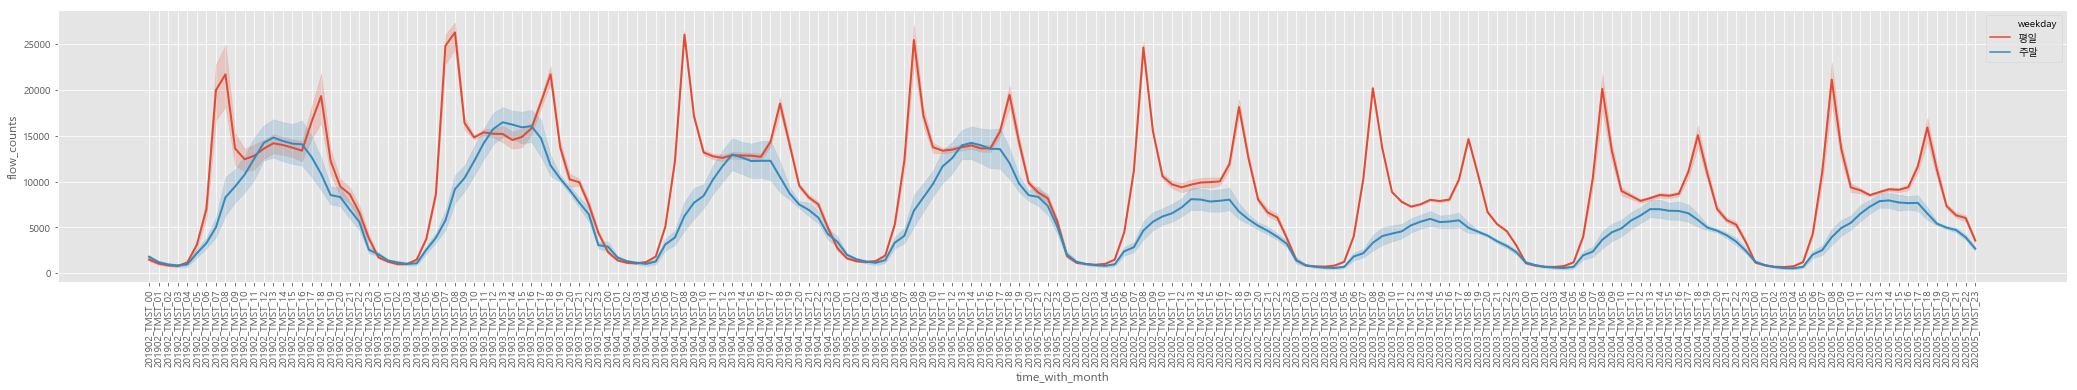

성내1동


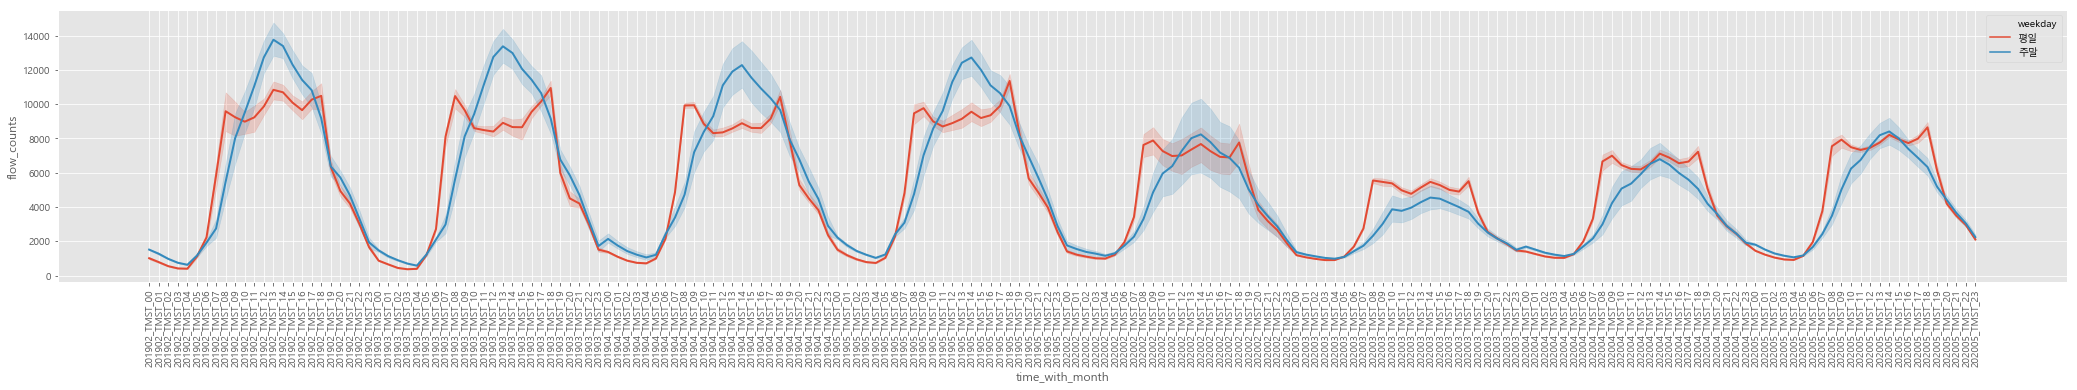

청구동


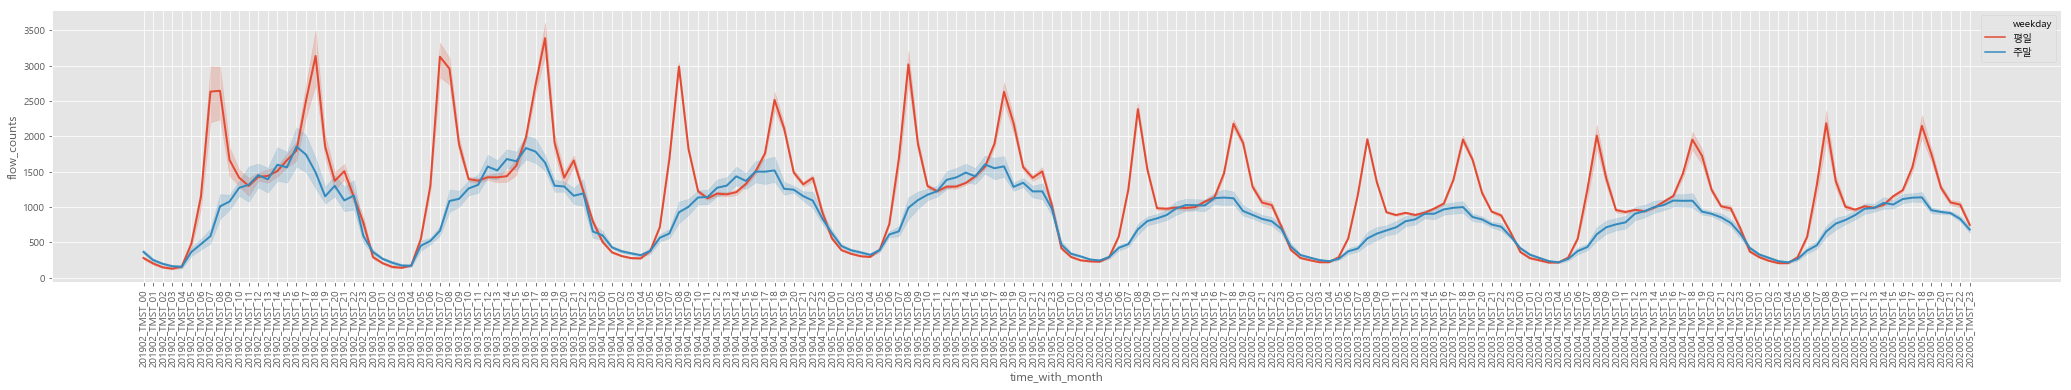

상계3.4동


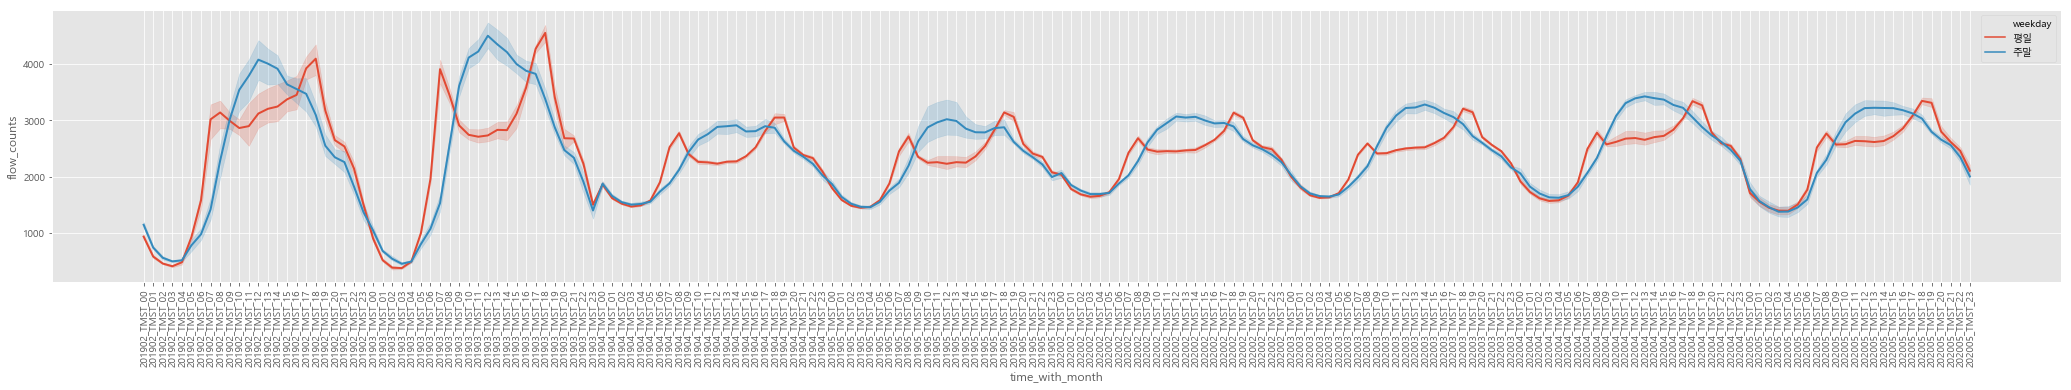

지산1동


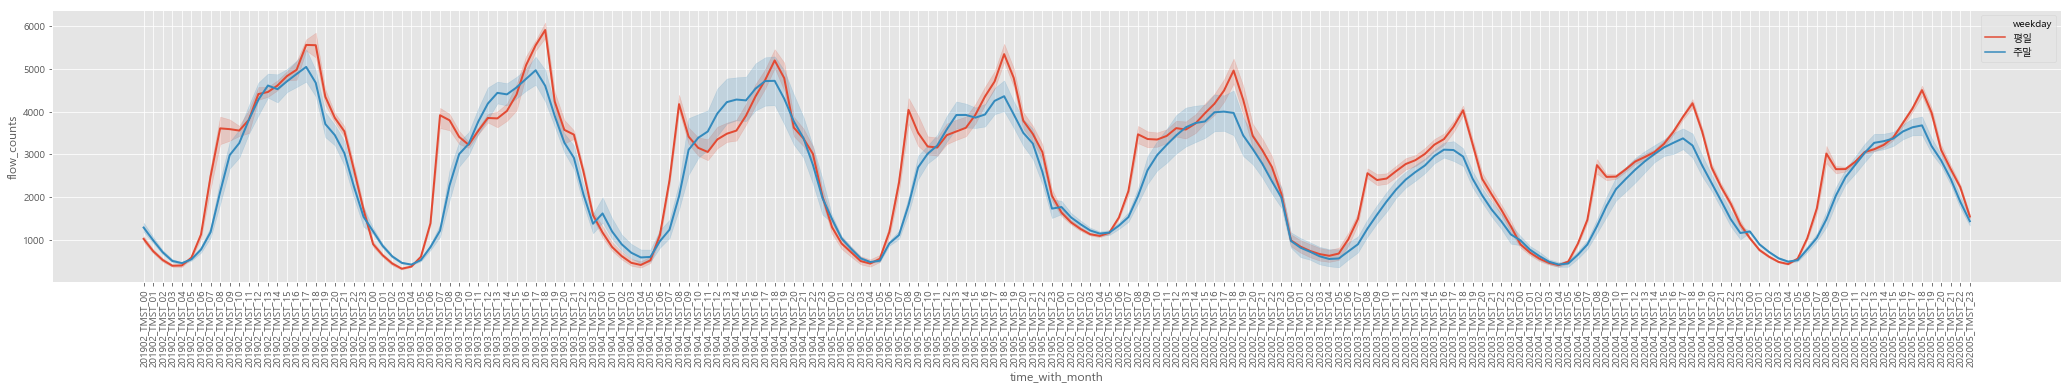

상계2동


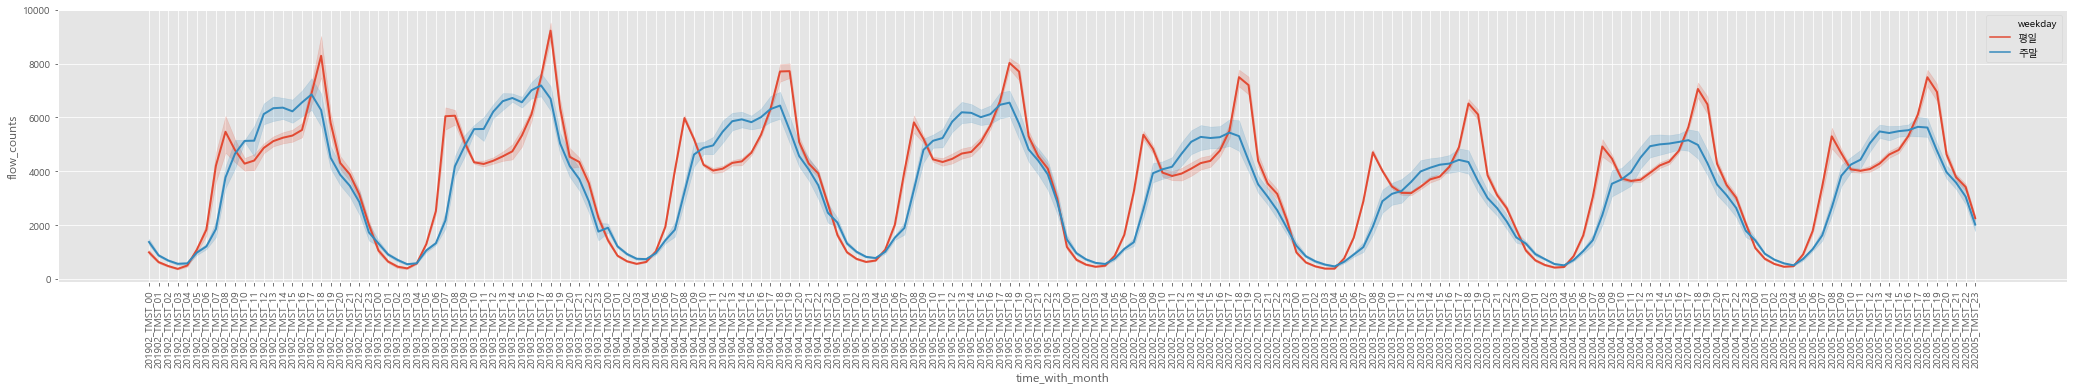

In [222]:
flow_with_month(melted_flow_time)

In [289]:
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [274]:
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [275]:
ts_scaler = TimeSeriesScalerMinMax()

In [299]:
ts_scaler.fit_transform(tmp_df[['flow_counts']].values.reshape(1,5784,1))

array([[[0.0886759 ],
        [0.05583683],
        [0.03634775],
        ...,
        [0.37148894],
        [0.28979961],
        [0.17135492]]])

In [305]:
ts_scaler.fit_transform(melted_flow_time[['flow_counts']].values.reshape(69,5784,1))

array([[[0.03037083],
        [0.0188837 ],
        [0.01121009],
        ...,
        [0.07135304],
        [0.0553023 ],
        [0.03538323]],

       [[0.03635525],
        [0.02197572],
        [0.01503261],
        ...,
        [0.1110875 ],
        [0.08688575],
        [0.04936461]],

       [[0.03404891],
        [0.02531091],
        [0.01517953],
        ...,
        [0.06044298],
        [0.04729105],
        [0.03143594]],

       ...,

       [[0.08512053],
        [0.05217251],
        [0.03088729],
        ...,
        [0.48943227],
        [0.39858451],
        [0.30833821]],

       [[0.05428947],
        [0.03705629],
        [0.02080305],
        ...,
        [0.25009924],
        [0.17545835],
        [0.10998197]],

       [[0.08646534],
        [0.05952162],
        [0.03939775],
        ...,
        [0.42096449],
        [0.32087931],
        [0.25695249]]])

In [306]:
ks = KShape(n_clusters=4, verbose=1, random_state=42)

In [309]:
melted_flow_time['time_with_month'] = melted_flow_time.apply(lambda x : str(x['STD_YM'])+'_'+x['time'], axis=1)

In [414]:
X = melted_flow_time.groupby(['HDONG_NM','weekday','time_with_month'])['flow_counts'].mean().values.reshape(69,384,1)

X_weekday = melted_flow_time.query('weekday==\'평일\'').groupby(['HDONG_NM','weekday','time_with_month'])['flow_counts'].mean()
X_weekend = melted_flow_time.query('weekday==\'주말\'').groupby(['HDONG_NM','weekday','time_with_month'])['flow_counts'].mean()

X_weekday = X_weekday.values.reshape(69, int(X_weekday.shape[0]/69),1)
X_weekend = X_weekend.values.reshape(69, int(X_weekend.shape[0]/69),1)

ts_X_weekday = ts_scaler.fit_transform(X_weekday)
ts_X_weekend = ts_scaler.fit_transform(X_weekend)

ks1 = KShape(n_clusters=4, verbose=1, max_iter=50)
ks2 = KShape(n_clusters=4, verbose=1, max_iter=50)

ts_clst_weekday = ks1.fit_predict(ts_X_weekday)
ts_clst_weekend = ks2.fit_predict(ts_X_weekend)

Resumed because of empty cluster
0.229 --> 0.227 --> 0.226 --> 0.226 --> 0.226 --> 0.224 --> 0.222 --> 0.220 --> 0.219 --> 0.216 --> 0.214 --> 0.212 --> 0.210 --> 0.209 --> 0.208 --> 0.207 --> 0.207 --> 0.208 --> 
0.204 --> 0.203 --> 0.202 --> 0.201 --> 0.201 --> 0.199 --> 0.197 --> 0.195 --> 0.193 --> 0.191 --> 0.189 --> 0.189 --> 0.189 --> 


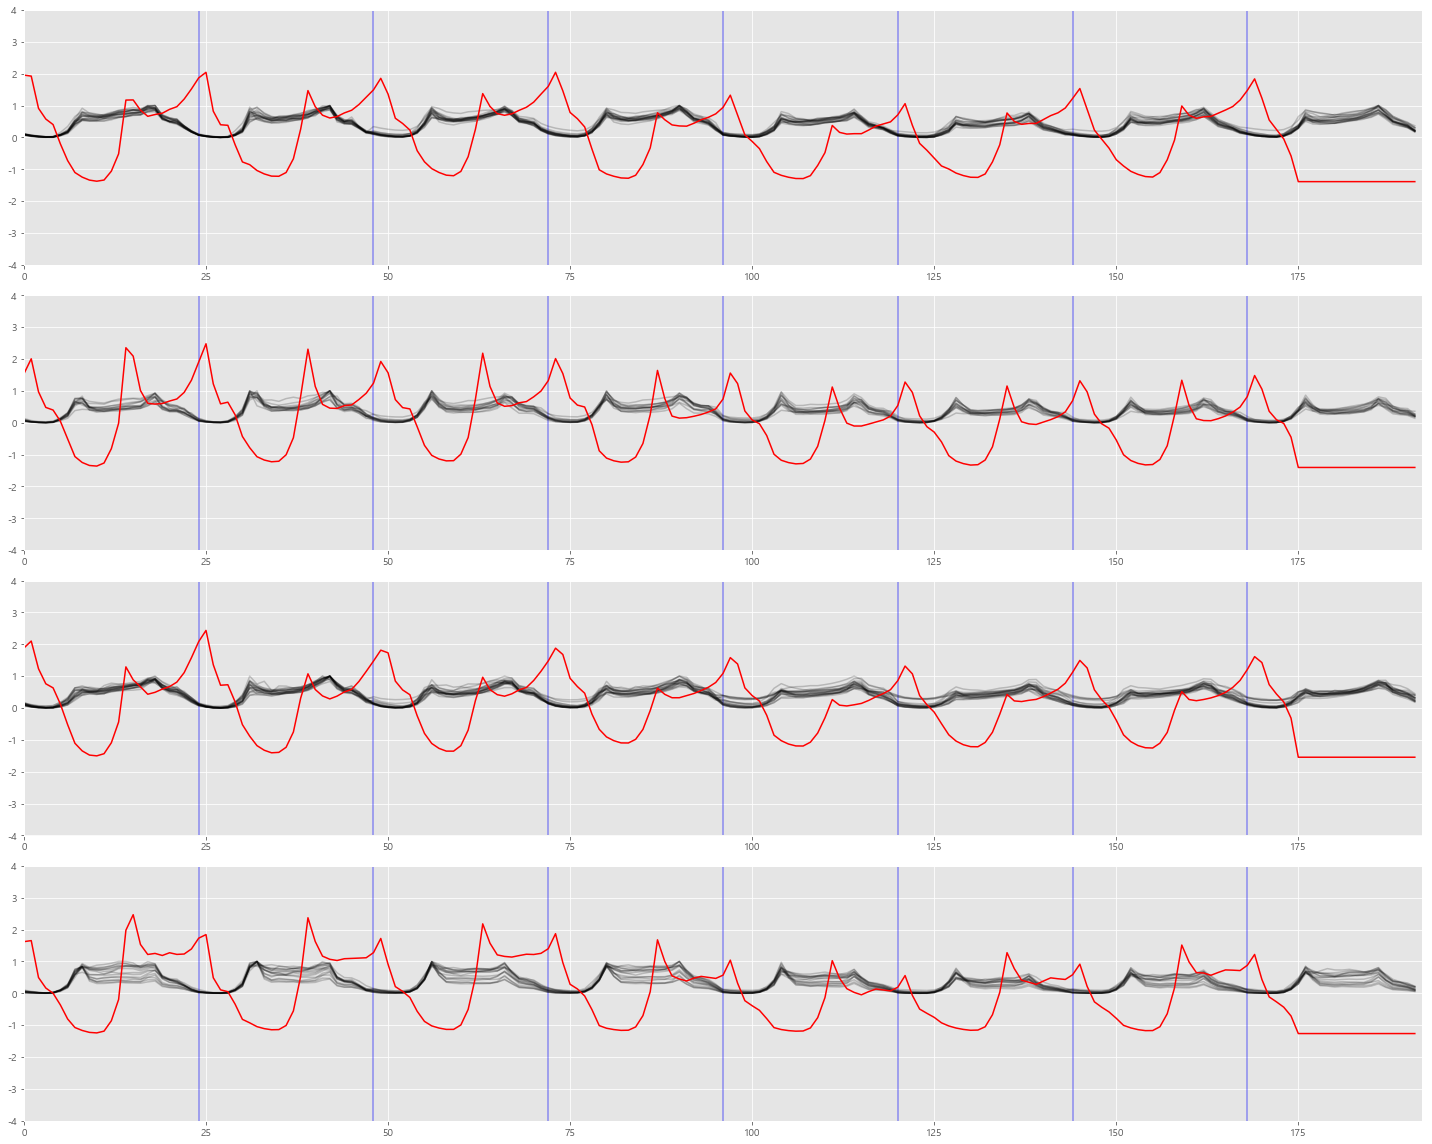

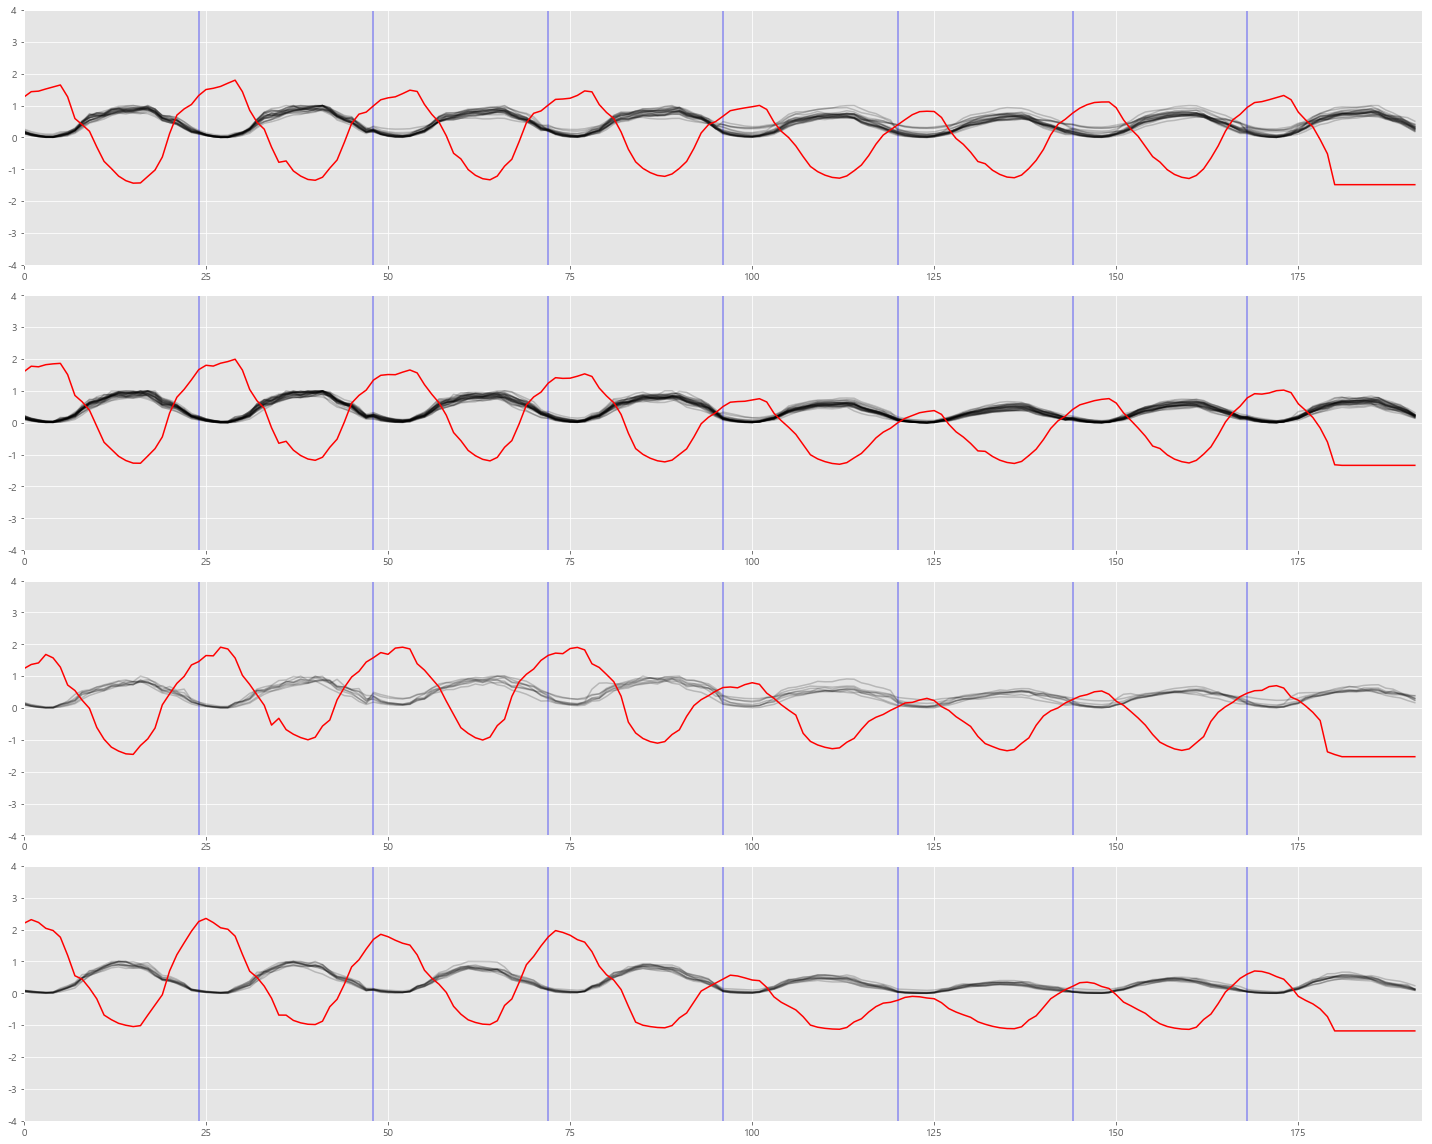

In [417]:
plt.figure(figsize=(20,16))
for yi in range(4):
    plt.subplot(4,1,1+yi)
    for xx in ts_X_weekday[ts_clst_weekday==yi]:
        plt.plot(xx.ravel(), 'k-', alpha=.2)
    plt.plot(ks1.cluster_centers_[yi].ravel(), 'r-')
    plt.xlim(0, ts_X_weekday.shape[1])
    plt.ylim(-4,4)
    plt.vlines(range(ts_X_weekday.shape[1])[::24], -4,4,alpha=0.4, color='blue')
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,16))
for yi in range(4):
    plt.subplot(4,1,1+yi)
    for xx in ts_X_weekend[ts_clst_weekend==yi]:
        plt.plot(xx.ravel(), 'k-', alpha=.2)
    plt.plot(ks2.cluster_centers_[yi].ravel(), 'r-')
    plt.xlim(0, ts_X_weekend.shape[1])
    plt.ylim(-4,4)
    plt.vlines(range(ts_X_weekday.shape[1])[::24], -4,4, alpha=0.4, color='blue')
plt.tight_layout()
plt.show()

In [418]:
ts_clst_weekday

array([2, 0, 2, 1, 3, 3, 3, 3, 0, 0, 1, 0, 0, 3, 3, 1, 2, 0, 0, 1, 3, 0,
       2, 0, 0, 0, 0, 3, 1, 2, 2, 2, 2, 0, 2, 2, 0, 3, 3, 3, 3, 0, 0, 0,
       1, 1, 1, 1, 2, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 3, 1, 1, 2,
       2, 1, 3], dtype=int64)

In [426]:
hdong_clst = melted_flow_time[['HDONG_NM']].drop_duplicates(['HDONG_NM'], keep='last').\
    sort_values(by='HDONG_NM').\
    reset_index(drop=True)

In [428]:
hdong_clst['weekday_clst'] = ts_clst_weekday
hdong_clst['weekend_clst'] = ts_clst_weekend

In [436]:
hdong_clst.query('weekday_clst==1').HDONG_NM.tolist()

['공릉1동',
 '다산동',
 '동화동',
 '만촌3동',
 '상계10동',
 '신당5동',
 '신당동',
 '약수동',
 '월계1동',
 '중림동',
 '청구동',
 '하계1동',
 '하계2동',
 '황학동']

### 평일/주말 시간별 유동인구 차이

In [461]:
melted_flow_time.groupby(['HDONG_NM', 'weekday', 'time_with_month'])['flow_counts'].mean().\
        reset_index(name='mean_flow_counts').\
        groupby(['HDONG_NM','time_with_month']).get_group(('고산1동','201902_TMST_00'))

,HDONG_NM,weekday,time_with_month,mean_flow_counts
0,고산1동,주말,201902_TMST_00,1675.6200
192,고산1동,평일,201902_TMST_00,1229.9755


In [486]:
flow_diff_rate = melted_flow_time.groupby(['HDONG_NM', 'weekday', 'time_with_month'])['flow_counts'].mean().\
        reset_index(name='mean_flow_counts').\
        groupby(['HDONG_NM','time_with_month'])['mean_flow_counts'].\
        apply(lambda x : np.divide(*x.values)).reset_index()

In [494]:
flow_diff_rate

,HDONG_NM,time_with_month,mean_flow_counts
0,고산1동,201902_TMST_00,1.362320
1,고산1동,201902_TMST_01,1.501363
2,고산1동,201902_TMST_02,1.459405
3,고산1동,201902_TMST_03,1.298600
4,고산1동,201902_TMST_04,1.063819
...,...,...,...
13243,회현동,202005_TMST_19,0.579084
13244,회현동,202005_TMST_20,0.850841
13245,회현동,202005_TMST_21,0.797885
13246,회현동,202005_TMST_22,0.745528


In [492]:
gc.collect()

35

In [503]:
flow_age.iloc[:,4:].sum(axis=1)

0        242230.68
1        133411.99
2         90124.93
3         83378.55
4        111009.47
           ...    
16624     44426.78
16625     52098.18
16626     56693.70
16627     53968.03
16628     45874.39
Length: 16629, dtype: float64

In [506]:
flow_age.iloc[:,4:].apply(lambda x : np.divide(x,x.sum()),axis=1)

,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,6.869485e-05,0.000480,0.001733,0.006414,0.021451,0.046219,0.058826,0.070164,0.064146,0.074514,...,0.055002,0.052599,0.048007,0.041311,0.040486,0.033437,0.029972,0.023769,0.013870,0.018295
1,2.353612e-05,0.001057,0.005721,0.010533,0.031750,0.056909,0.054415,0.050384,0.044608,0.049858,...,0.059202,0.049323,0.042835,0.037075,0.037893,0.034182,0.032715,0.028774,0.018394,0.024040
2,1.531208e-05,0.001336,0.007747,0.012396,0.033652,0.057402,0.056233,0.052832,0.043560,0.052176,...,0.056362,0.049425,0.043332,0.038663,0.041090,0.036286,0.033110,0.027573,0.016773,0.021692
3,9.594794e-07,0.001698,0.009264,0.014978,0.036004,0.055672,0.054069,0.053699,0.046945,0.052633,...,0.051783,0.044094,0.042054,0.037288,0.039867,0.034078,0.031716,0.025958,0.014755,0.018234
4,0.000000e+00,0.002294,0.012566,0.019734,0.030810,0.049350,0.051665,0.056916,0.051000,0.058805,...,0.043364,0.044752,0.046500,0.043750,0.046957,0.040203,0.037685,0.029417,0.015249,0.019342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,0.000000e+00,0.001577,0.011683,0.021529,0.027133,0.033934,0.033775,0.045353,0.051663,0.066351,...,0.027036,0.024908,0.038903,0.049729,0.063217,0.061259,0.046607,0.036318,0.024452,0.025736
16625,0.000000e+00,0.001901,0.014384,0.020839,0.031476,0.034115,0.034090,0.041028,0.049571,0.065555,...,0.026449,0.024147,0.035464,0.051387,0.064161,0.058288,0.045869,0.035489,0.024784,0.029087
16626,0.000000e+00,0.002746,0.013788,0.021800,0.030109,0.034973,0.033947,0.044097,0.049567,0.063946,...,0.027932,0.026230,0.037911,0.051450,0.064263,0.059887,0.049389,0.036040,0.023921,0.025680
16627,0.000000e+00,0.002222,0.016748,0.022914,0.031908,0.039698,0.039032,0.041059,0.049090,0.068811,...,0.030476,0.026318,0.033580,0.048931,0.062301,0.053909,0.043615,0.033586,0.023024,0.025429


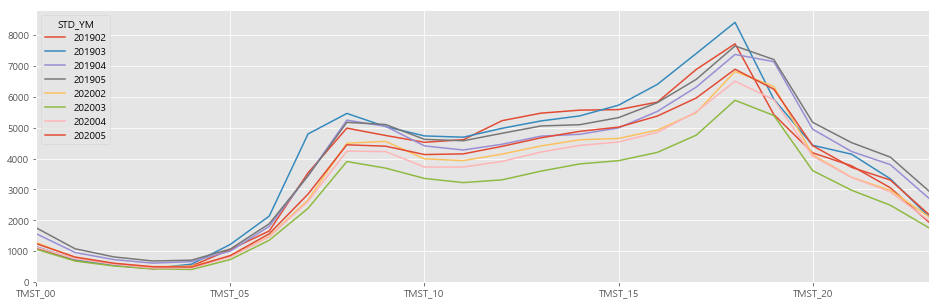

In [522]:
flow_time.loc[flow_time.HDONG_NM=="상계2동"].groupby('STD_YM').mean().drop(['STD_YMD','HDONG_CD'], axis=1).T.plot(figsize=(16,5))

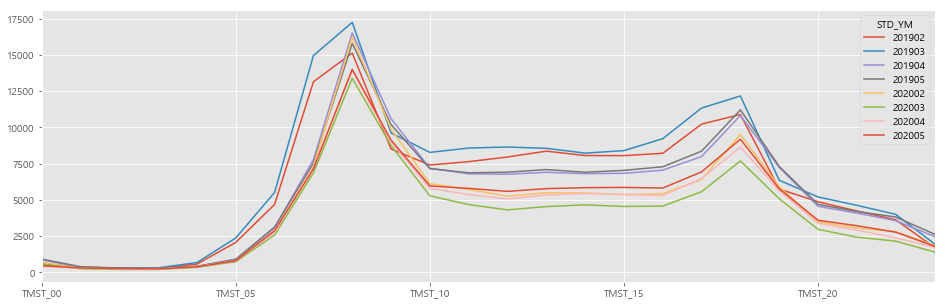

In [521]:
flow_time.loc[flow_time.HDONG_NM=="을지로동"].groupby('STD_YM').mean().drop(['STD_YMD','HDONG_CD'], axis=1).T.plot(figsize=(16,5))

In [516]:
flow_time.loc[flow_time.HDONG_NM=="을지로동"].groupby('STD_YM').mean().drop(['STD_YMD','HDONG_CD'], axis=1)

,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
STD_YM,,,,,,,,,,,,,,,,,,,,,
201902,545.254286,317.343571,263.325357,259.845000,576.902500,2071.614643,4689.992857,13140.292500,15120.986071,8509.439643,...,8058.575357,8051.330357,8212.360714,10223.948214,10888.162857,5750.261071,4870.862143,4237.260357,3630.289643,1726.812143
201903,613.469355,371.837742,303.978065,317.539355,683.177419,2380.062258,5514.110000,14948.254839,17237.256774,9615.662903,...,8224.084516,8396.791290,9220.781613,11330.288710,12163.000968,6354.791613,5203.444516,4627.612258,4004.480968,1973.980323
201904,865.113667,357.168333,287.051000,272.359333,421.063333,917.936333,3076.305667,7781.312333,16504.810000,10596.534333,...,6810.317000,6833.703333,7049.810333,7991.614000,10817.577667,7244.787667,4559.098000,4091.687000,3569.846333,2473.988667
201905,922.066774,395.821935,303.933871,287.695161,422.511290,898.246129,3130.953226,7525.063548,15782.744194,10193.638387,...,6905.576774,7037.285484,7284.892903,8359.171935,11204.627742,7306.575484,4690.797742,4202.004194,3820.800323,2639.573226
202002,692.547241,293.324828,249.353103,237.485172,389.765862,811.683103,2812.466207,7331.577931,16211.215172,9886.901724,...,5481.845172,5354.054828,5426.866897,6410.523103,9510.533103,5905.652069,3494.185517,3064.175862,2813.099310,1866.874483
202003,568.983871,254.181290,210.158065,207.430000,352.292581,741.744194,2580.339677,6864.006774,13382.837097,8750.285161,...,4661.706452,4549.131935,4575.010968,5565.303548,7689.858065,5080.570000,2970.336129,2433.212903,2156.634839,1412.776129
202004,416.615667,293.910667,242.229667,233.253000,391.770000,790.180667,2757.551667,7281.705667,13906.297333,8992.425000,...,5440.809000,5386.370000,5298.842333,6471.934667,8647.581000,5642.138333,3391.812333,2918.606667,2388.455333,1730.020000
202005,464.980000,315.410000,265.803871,247.916452,388.250968,802.383226,2879.961935,7131.741935,13996.697419,9119.717419,...,5843.316774,5861.382581,5818.151290,6932.197742,9181.435484,5765.099677,3597.302258,3221.586129,2777.749355,1810.441290
